In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_path = r'D:\dataset\final sheet - Copy.csv'
dataset = pd.read_csv(csv_path)

In [3]:
input_data = dataset.drop(columns = ["UCS"])
output_data = dataset['UCS']
from sklearn.preprocessing import minmax_scale
X =  minmax_scale(input_data, feature_range=(0,1))
Y = minmax_scale(output_data, feature_range=(0,1))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [6]:
y_pred = reg.predict(X_test)

In [7]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.040521836310029466
Mean Squared Error: 0.00390077787387789
Root Mean Squared Error: 0.06245620764886298


In [8]:
from sklearn.metrics import r2_score
print('correlation fatcor',r2_score(y_test, y_pred))

correlation fatcor 0.9052705820057197


Feature: 0, Score: 0.05728
Feature: 1, Score: 0.12019
Feature: 2, Score: 0.03581
Feature: 3, Score: 0.06427
Feature: 4, Score: 0.09720
Feature: 5, Score: 0.02538
Feature: 6, Score: 0.24097
Feature: 7, Score: 0.02043
Feature: 8, Score: 0.02279
Feature: 9, Score: 0.20054
Feature: 10, Score: 0.05363
Feature: 11, Score: 0.06152


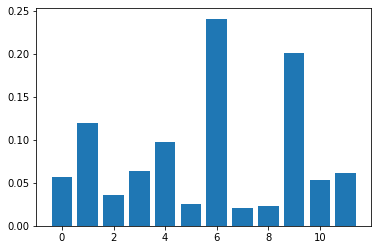

In [9]:
importance = reg.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()